# Fake job Prediction: Investigating the pattern to avoid the job scam

# Notebook  2: EDA
**second setp: Exploratory data analysis**



**By: Polly Pang**


In this portion of the notebook, I will process the Exploratory data analysis, with will give more information and insights of the dataset. Additionally, I will are merge the dataset to preprocess for the next NLP(Natural language processing) part.
___

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home"> Contents</h3>

* [1. Libraries and data import](#1)
* [2. Exploratory Data Analysis and Distributions](#2)
    - [2.1 Distributions of Target Variable](#2.1)
    - [2.2 Distributions of Target Variables](#2.2)


# 1. Libraries and data import

In [16]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style="darkgrid")
import plotly.express as px
import plotly.subplots as sp

import joblib as joblib

In [2]:
# load data
fake_job_df = joblib.load('data/fake_job_cleaned.pkl')

In [3]:
# check df head
fake_job_df.head()

,title,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,province,city,min_salary,max_salary
0,Marketing Intern,Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Blank,0,1,0,Other,Internship,Blank,Blank,Marketing,0,US,NY,New York,Blank,Blank
2,Commissioning Machinery Assistant (CMA),Blank,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Blank,0,1,0,Blank,Blank,Blank,Blank,Blank,0,US,IA,Wever,Blank,Blank
3,Account Executive - Washington DC,Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,DC,Washington,Blank,Blank
4,Bill Review Manager,Blank,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,FL,Fort Worth,Blank,Blank
5,Accounting Clerk,Blank,Blank,Job OverviewApex is an environmental consultin...,Blank,Blank,0,0,0,Blank,Blank,Blank,Blank,Blank,0,US,MD,Blank,Blank,Blank


# 2.  Exploratory Data Analysis and Distributions<a id="2"></a>
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

## 2.1 Distributions of Target Variable

- invesitgate on column `fraudulent`

In [28]:
# plot distribution of Fraud and True job post 
target_count=fake_job_df['fraudulent'].value_counts().to_frame()

fig = px.bar(target_count, x=target_count.index, y=target_count['fraudulent'], title='Count Fraud VS Real',
             color=target_count['fraudulent'],
             labels={
                     "index": "Fraud or Not",
                     "fraudulent": "Fraudulent Count"
                 },
              width=600,height=500)

fig.show()

In [29]:
pct_job=fake_job_df['fraudulent'].value_counts(normalize=True).to_frame()
fig = px.pie(target_count, names=target_count.index, values=target_count['fraudulent'], title='% Fraud VS Real',
             color=target_count['fraudulent'],
             labels={
                     "index": "Fraud or Not",
                     "fraudulent": "Fraudulent Count"
                 },
              width=600,height=500)

fig.show()

- Only a small proportion of posts are fake posts, only 4.84 % of the posts are frud. 
- The dataset is **highly skewed.** dataset with only 866 fake postings concerning 17013 real job postings.

## 2.2 Distributions of Features

In [59]:
# check the columns
fake_job_df.columns

Index(['title', 'department', 'company_profile', 'description', 'requirements',
       'benefits', 'telecommuting', 'has_company_logo', 'has_questions',
       'employment_type', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent', 'country', 'province', 'city',
       'min_salary', 'max_salary'],
      dtype='object')

In [60]:
fake_job_df.sample()

,title,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,province,city,min_salary,max_salary
380,Ext JS Developer,Blank,Blank,The Ext JS Developer is a key member of the de...,Required SkillsBachelor’s degree in related fi...,Full Benefits and Bonus.,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0,US,NY,New York,90000,120000


#### Plan:
- column: `company_profile`,`description`,`requirements`,`benefits` are all text features, I will process further investigate in the NLP process.
- I will take a close look at categorical features.

## 2.3 Help functions

In [308]:
# Helper make table top 10 observation for the feature
'''
Approach 1, matplotlibs, not using for now
'''
def top10_count_table_maker(col,df):
    
    df_out=df[col].value_counts().reset_index().iloc[:10]
    df_out.columns=[col,'counts']
    return df_out

In [297]:
# Helper function 
# plot top 10 observation for the feature

def countplot_maker(col,df):
    plt.figure(figsize=(12,6))
    #x=df[df[col].values!="Blank"][col].values
    sns.countplot(x=col, data=df[df[col]!='Blank'], hue="fraudulent", order=df[col].value_counts().iloc[:10].index)
    plt.xticks(rotation=60,fontsize=12)
    plt.xlabel(col,fontsize=15)
    plt.ylabel("count",fontsize=15)
    plt.title(f"top 10 {col} distribution",
          fontsize = 20)
    #plt.yticks(np.arange(0, 350, 30))
    plt.show()
    

In [254]:
# Helper function 
#Table target feature,fraudulent, counts and % of each propotions

def maker_pct(col1,col2,df):
    df_out= pd.DataFrame()
    df_out=df.groupby([col1,col2]).size().reset_index()
    df_out['percentage']=fake_job_df.groupby([col1,col2]).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values  
    df_out.columns = [col1, col2,'Counts', 'Percentage']
    # get rid of 'blank'
    df_out=df_out[df_out[col1]!='Blank']
    #print(df_out)
    fig=px.bar(df_out, x=col1, y='Counts', color=col2, text=df_out['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)),
          title=f"Distribution of {col1}")
    fig.update_layout(barmode='stack', xaxis={'categoryorder':'total ascending'})
    return fig.show()

In [64]:
### not in use!!!!
#function ploty bar chart plot distribution of target feature, hue=fraudulent, and percentage of each propotions
def bar_pct(col1,col2):
    fig=px.bar(df_out, x=col1, y='Counts', color=col2, text=df_out['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)),
          title=f"Distribution of {col1}")
    return fig.show()


In [265]:
# Helper function of make pct-components for each feature

def table_maker_pct(col,df):
    pct_out=df[col].value_counts(normalize=True).reset_index().sort_values(col,ascending=False)
    pct_out.rename(columns={'index':'Type'},inplace=True)
    pct_out=pct_out[pct_out['Type']!='Blank']
    return pct_out


----

## Employee Type

In [266]:
# pct of components
table_maker_pct('employment_type',fake_job_df)

,Type,employment_type
0,Full-time,0.649869
2,Contract,0.085240
3,Part-time,0.044577
4,Temporary,0.013480
5,Other,0.012696


In [264]:
# distribnution of 
maker_pct('employment_type','fraudulent',fake_job_df)

- Most of the the job type is Full time job (64%), another 2 most popular employment types is Contract and part_time job.
- Fraudulent posts most likely happens on Part_time jobs and Full time jobs.

## telecommuting

In [267]:
table_maker_pct('telecommuting',fake_job_df)

,Type,telecommuting
0,0,0.957101
1,1,0.042899


In [276]:
maker_pct('telecommuting','fraudulent',fake_job_df)

- 96% of all the post have concat number, only less then 5% of these posts are fake. On the other hand, there are 4% pf the job post which don't contain and over than 8% of them are fake.
- Most pf the real job posts include number in them.

## has_company_logo

In [268]:
table_maker_pct('has_company_logo',fake_job_df)

,Type,has_company_logo
0,1,0.795291
1,0,0.204709


In [256]:
maker_pct('has_company_logo','fraudulent',fake_job_df)

- Around 80% of the job posts have company logo, only 2% of these posts (with logo) are fraudulents.ies 
- 20% of the posts don't include their company logos, in these posts (with no logo) near 16% are fraudulents.
- Most of the comanpies including their logo in the job posts, and majority of them are real.

## has_questions

In [269]:
table_maker_pct('has_questions',fake_job_df)

,Type,has_questions
0,0,0.50825
1,1,0.49175


In [257]:
maker_pct('has_questions','fraudulent',fake_job_df)

- Looks like for `has_questions` this is a nearly half-halg situation. From the investgate, I obseved fake posts have a slightly heigher quantity on including questions in the job post.
- posts with no questions has around 3 times fake posts compare with the with_question posts.

## required_experience

In [270]:
table_maker_pct('required_experience',fake_job_df)

,Type,required_experience
1,Mid-Senior level,0.213043
2,Entry level,0.150847
3,Associate,0.128475
4,Not Applicable,0.062364
5,Director,0.021757
6,Internship,0.021310
7,Executive,0.007886


In [258]:
maker_pct('required_experience','fraudulent',fake_job_df)

- Most of the do not require previous experience (range 20-40%), regardless the job level.
- The fraudulent concentrated in Entry_level. Which is make sense, the scamers what to attract more potential victims.
- Most executive or entry level jobs that require minimum qualifications and little experience have highest fraud rate, nearly 7%.

## required_education

In [271]:
table_maker_pct('required_education',fake_job_df)

,Type,required_education
1,Bachelor's Degree,0.287768
2,High School or equivalent,0.116338
3,Unspecified,0.078136
4,Master's Degree,0.023268
5,Associate Degree,0.015325
6,Certification,0.009508
7,Some College Coursework Completed,0.005705
8,Professional,0.004139
9,Vocational,0.002741
10,Some High School Coursework,0.001510


In [272]:
maker_pct('required_education','fraudulent',fake_job_df)

- In this dataset I obsered, most of the job posts don't mentioned education-level in the post. For the others, a large percentage of them will requie a Bachelor's Degree (28%).
- As high as 74% of fake jobs require little educational credentials - “Some High School Coursework”.

## Department

In [309]:
de_out=top10_count_table_maker('department',fake_job_df)
de_out[de_out['department']!='Blank']

,department,counts
1,Sales,551
2,Engineering,487
3,Marketing,401
4,Operations,270
5,IT,225
6,Development,146
7,Product,112
8,Information Technology,86
9,Technology,76


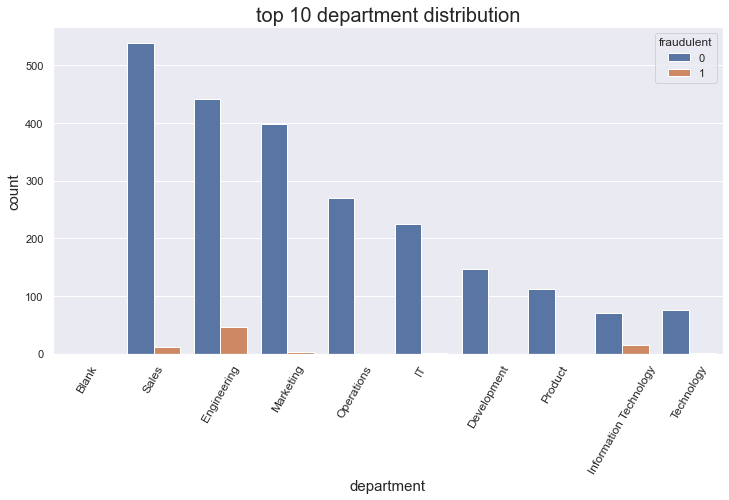

In [298]:
# top 10 Department distribution (number count)
countplot_maker('department',fake_job_df)

- Top hiring departments are Sales (551), Engineering (487) and Marketing (401).
- Engineering department has the most fake posts.

## title

In [299]:
# top 10 title
top10_count_table_maker('title',fake_job_df)

,title,counts
0,English Teacher Abroad,311
1,Customer Service Associate,146
2,Graduates: English Teacher Abroad (Conversatio...,144
3,English Teacher Abroad,95
4,Software Engineer,86
5,English Teacher Abroad (Conversational),83
6,Customer Service Associate - Part Time,76
7,Account Manager,75
8,Web Developer,66
9,Project Manager,62


In [300]:
# pct of top 10 titles
table_maker_pct('title',fake_job_df)[:11]

,Type,title
0,English Teacher Abroad,0.017395
1,Customer Service Associate,0.008166
2,Graduates: English Teacher Abroad (Conversatio...,0.008054
3,English Teacher Abroad,0.005313
4,Software Engineer,0.004810
5,English Teacher Abroad (Conversational),0.004642
6,Customer Service Associate - Part Time,0.004251
7,Account Manager,0.004195
8,Web Developer,0.003691
9,Project Manager,0.003468


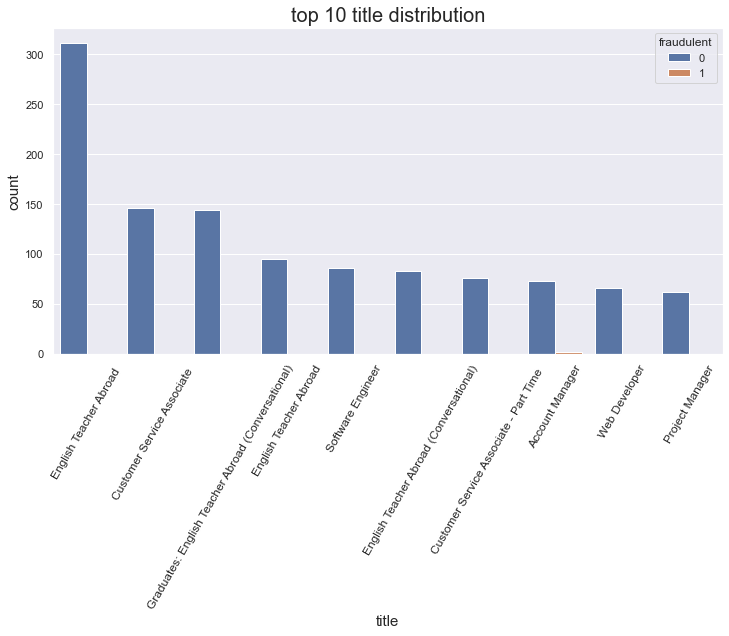

In [302]:
#plot top 10 title
countplot_maker('title',fake_job_df)

- These are top 10 titles in from the investigate. The number of English Teacher abroad is 2 times higher than the other top titles.
- In these top titles only a few fake posts from Account Manager cohort, I believe this feature may not be highly related to my target `fraudulent`

## industry

In [310]:
# top 10 industry
in_out=top10_count_table_maker('industry',fake_job_df)
in_out[in_out['industry']!='Blank']

,industry,counts
1,Information Technology and Services,1734
2,Computer Software,1376
3,Internet,1062
4,Marketing and Advertising,827
5,Education Management,822
6,Financial Services,779
7,Hospital & Health Care,497
8,Consumer Services,358
9,Telecommunications,342


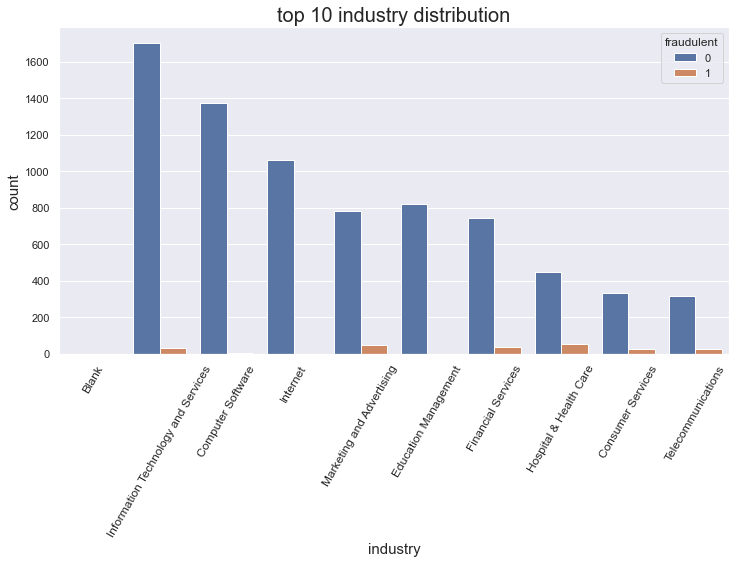

In [303]:
# top 10 industry plot
countplot_maker('industry',fake_job_df)

- Most job openings are IT related such as Information Technology and Services (1734), Computer Software (1376) and Internet (1,062).
- Fake posts are more likely happens in industry: Hospital & Health Care,Marketing and Advertising,Financial Services.

## function

In [313]:
# top 10 function
func_out=top10_count_table_maker('function',fake_job_df)
func_out[func_out['function']!='Blank']

,function,counts
1,Information Technology,1749
2,Sales,1468
3,Engineering,1348
4,Customer Service,1228
5,Marketing,830
6,Administrative,630
7,Design,340
8,Health Care Provider,338
9,Other,325


In [317]:
table_maker_pct('function',fake_job_df)[0:10]

,Type,function
1,Information Technology,0.097824
2,Sales,0.082108
3,Engineering,0.075396
4,Customer Service,0.068684
5,Marketing,0.046423
6,Administrative,0.035237
7,Design,0.019017
8,Health Care Provider,0.018905
10,Education,0.018178
9,Other,0.018178


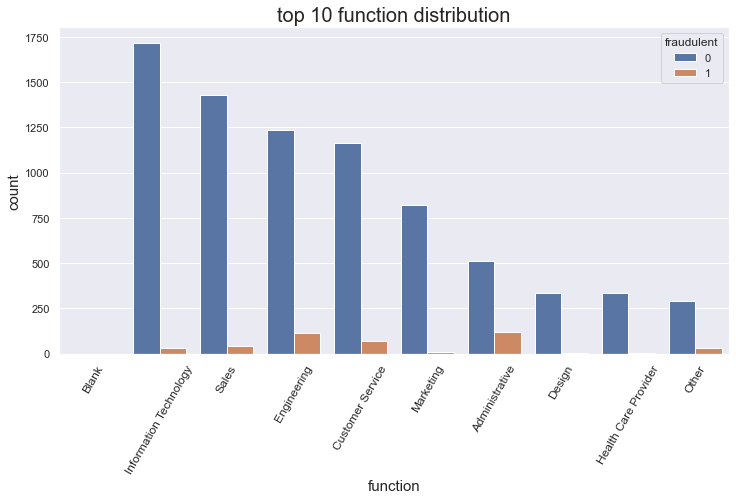

In [314]:
# plot top 10 function
countplot_maker('function',fake_job_df)

- Top 5 functions are Information Technology,Sales,Engineering,Customer Service,and Marketing.
- Functions with highest fraudulent job postings is Administrative, close to 19%, followed by Financial Analyst, Accounting/Auditing. Admin jobs seem most suspicious. Possibly, it’s easy for scammers to disguise their scams.

### loction

- country wise job post distribution

In [225]:
# top 10 fake job city_wise
df_country_fake=fake_job_df[fake_job_df['fraudulent']==1].groupby('country').count()['title'].sort_values(ascending=False).reset_index()
df_country_fake.columns=['country','fake_counts']
df_country_fake[:10]

,country,fake_counts
0,US,730
1,AU,40
2,GB,23
3,Blank,19
4,CA,12
5,MY,12
6,QA,6
7,BH,5
8,IN,4
9,PL,3


In [320]:
# real job psots country-wise
df_country_real=fake_job_df[fake_job_df['fraudulent']==0].groupby('country').count()['title'].sort_values(ascending=False).reset_index()
df_country_real.columns=['country','real_counts']
df_country_real[:10]

,country,real_counts
0,US,9926
1,GB,2361
2,GR,940
3,CA,445
4,DE,383
5,NZ,332
6,Blank,327
7,IN,272
8,AU,174
9,PH,131


In [318]:
# total job post by country
df_country=fake_job_df.groupby('country').count()['function'].reset_index()
df_country.columns=['country',"job post count"]
df_country=df_country.sort_values(by='job post count',ascending=False).iloc[:10]
df_country.reset_index(drop=True,inplace=True)
df_country

,country,job post count
0,US,10656
1,GB,2384
2,GR,940
3,CA,457
4,DE,383
5,Blank,346
6,NZ,332
7,IN,276
8,AU,214
9,PH,132


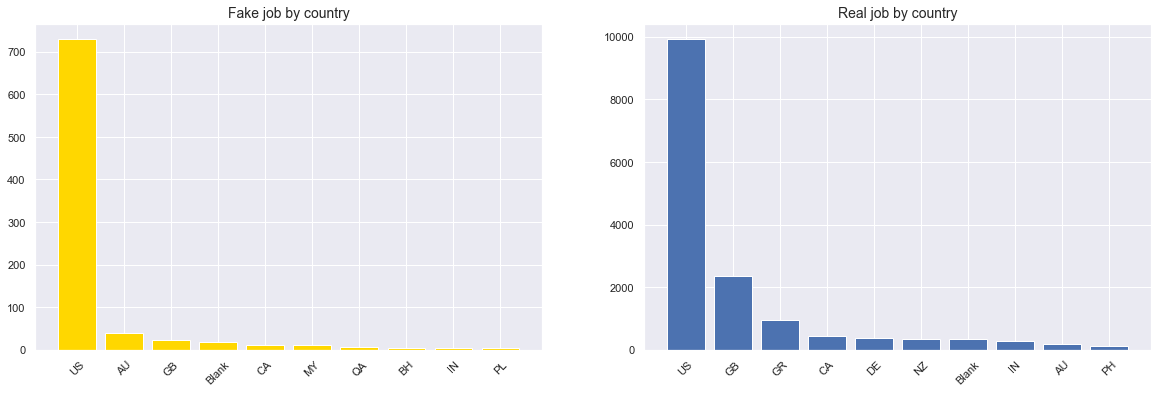

In [319]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ax1.set_title('Fake Post')
plt.bar(x=df_country_fake[:10]['country'],height=df_country_fake[:10]['fake_counts'],color='gold')
plt.title("Fake job by country",fontsize='14')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
ax1.set_title('Real Post')
plt.bar(x=df_country_real[:10]['country'],height=df_country_real[:10]['real_counts'])
plt.title("Real job by country",fontsize='14')
plt.xticks(rotation=45)
    
plt.show()

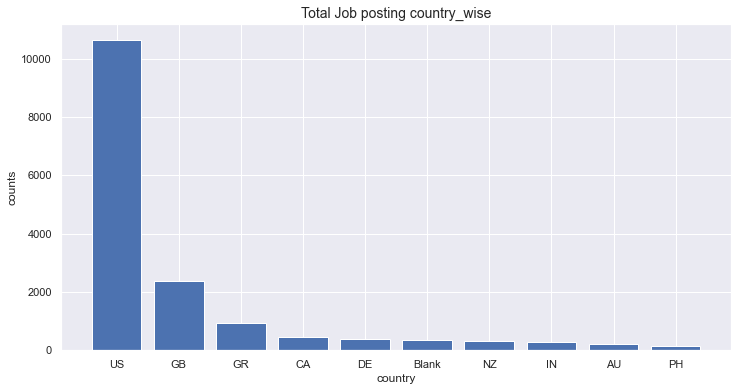

In [229]:
plt.figure(figsize=(12,6))
plt.title("Total Job posting country_wise",fontsize='14')
plt.bar(x=df_country['country'],height=df_country['job post count'])
plt.xlabel('country')
plt.ylabel("counts")
plt.show()

- Top 5 countries with most of the number of job postings are US, GB, GR, CA, DE, United States listed 10,656 job postings, followed by 2,384 for United Kingdom and 940 for Greece.
- Obviously US has the largest number of fake job posts,and followed by UA and GB.

In [350]:
# total job post by city
df_city=fake_job_df.groupby('city').count()['function'].reset_index()
df_city.columns=['city',"job post count"]
df_city=df_city.sort_values(by='job post count',ascending=False).iloc[:10]
df_city.reset_index(drop=True,inplace=True)
df_city=df_city[1:11]
df_city

,city,job post count
1,London,1060
2,New York,669
3,Athens,542
4,San Francisco,477
5,Houston,271
6,Berlin,262
7,Chicago,257
8,Washington,255
9,Auckland,226


In [354]:
# top 10 fake job city_wise
df_city_fake=fake_job_df[fake_job_df['fraudulent']==1].groupby('city').count()['title'].sort_values(ascending=False).reset_index()
df_city_fake.columns=['city','fake_counts']
df_city_fake=df_city_fake[1:11]
df_city_fake

,city,fake_counts
1,Houston,92
2,Sydney,31
3,Bakersfield,24
4,Los Angeles,23
5,San Mateo,22
6,New York,20
7,San Jose,16
8,AUSTIN,15
9,DALLAS,12
10,San Francisco,11


In [355]:
# top 10 real job city_wise
df_city_real=fake_job_df[fake_job_df['fraudulent']==0].groupby('city').count()['title'].sort_values(ascending=False).reset_index()
df_city_real.columns=['city','real_counts']
df_city_real=df_city_real[1:11]
df_city_real

,city,real_counts
1,London,1056
2,New York,649
3,Athens,542
4,San Francisco,466
5,Berlin,262
6,Washington,253
7,Chicago,253
8,Auckland,226
9,Houston,179
10,Austin,171


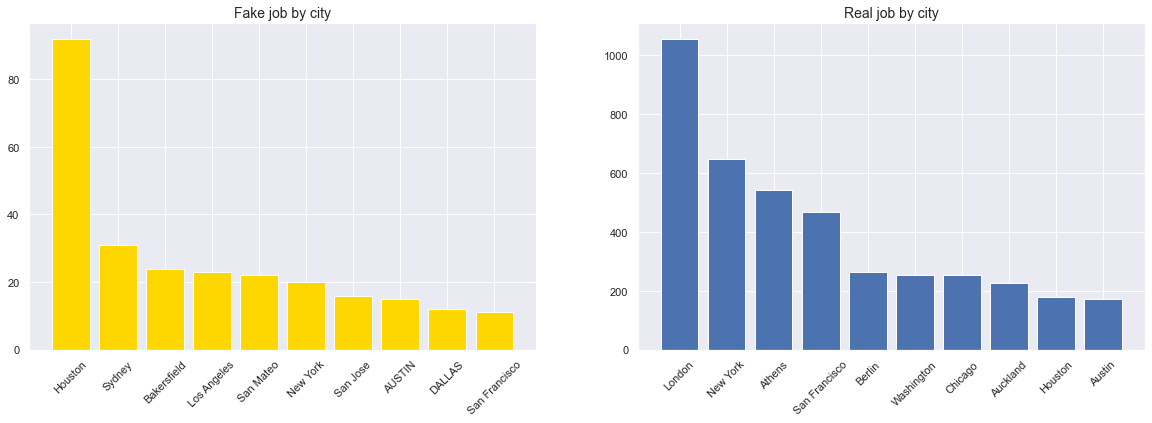

In [349]:
# fake real job city_wise
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ax1.set_title('Fake Post')
plt.bar(x=df_city_fake[:10]['city'],height=df_city_fake[:10]['counts'],color='gold')
plt.title("Fake job by city",fontsize='14')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
ax1.set_title('Real Post')
plt.bar(x=df_city_real[:10]['city'],height=df_city_real[:10]['counts'])
plt.title("Real job by city",fontsize='14')
plt.xticks(rotation=45)
    
plt.show()

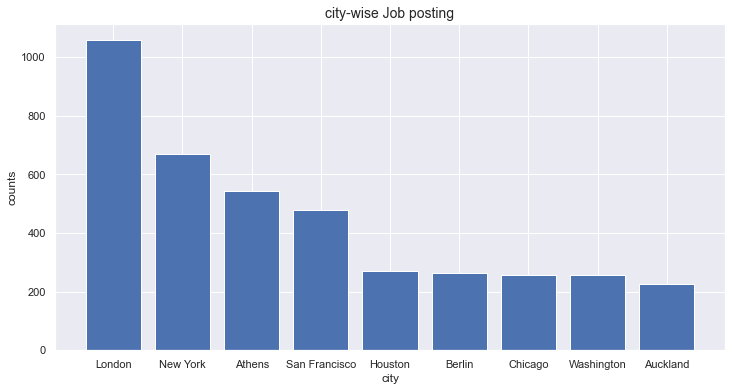

In [351]:
plt.figure(figsize=(12,6))
plt.title("city-wise Job posting",fontsize='14')
plt.bar(x=df_city['city'],height=df_city['job post count'])
plt.xlabel('city')
plt.ylabel("counts")
plt.show()

- Top 3 job locations are London,New York，and Athens.
- Top 3 fake job posts happens in Houston,Sydney and Bakersfield. 2 of 3 of them are from US, therefore I observied, 34% of posts with job loaction Houston are fake.

# Number of character

### Plan:
- Compare the number of character in the fake post and real post and try to distinguish pattern in the fake and real post based on number of charater used in the post.

In [142]:
# function of rerturn length of target features
def str_len_count(col,df):
    fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
   # get length
    length=df[df["fraudulent"]==1][col].str.len()
    ax1.hist(length,bins = 20,color='gold')
    ax1.set_title('Fake Post')
 
    length=fake_job_df[fake_job_df["fraudulent"]==0][col].str.len()
    ax2.hist(length, bins = 20)
 
    ax2.set_title('Real Post')
    fig.suptitle(f'Characters in {col}')
    
    plt.show()


In [143]:
# n=0,1 1=fake 0=real
# function of rerturn tartget features words count mean and median
def avg_table_maker(col,df,n):
    if n==1:
        out_df=df[df["fraudulent"]==1][col].str.len().agg(['mean','median']).to_frame()
        out_df.columns=[f'Fake job {col}']
        return out_df
    if n==0:
        out_df=df[df["fraudulent"]==0][col].str.len().agg(['mean','median']).to_frame()
        out_df.columns=[f'real job {col}']
        return out_df
    else:
        print("n only = 0 or 1")

### description

In [145]:
avg_table_maker('description',fake_job_df,0)

,real job description
mean,1221.1694
median,1027.0000


In [146]:
avg_table_maker('description',fake_job_df,1)

,Fake job description
mean,1154.840647
median,844.500000


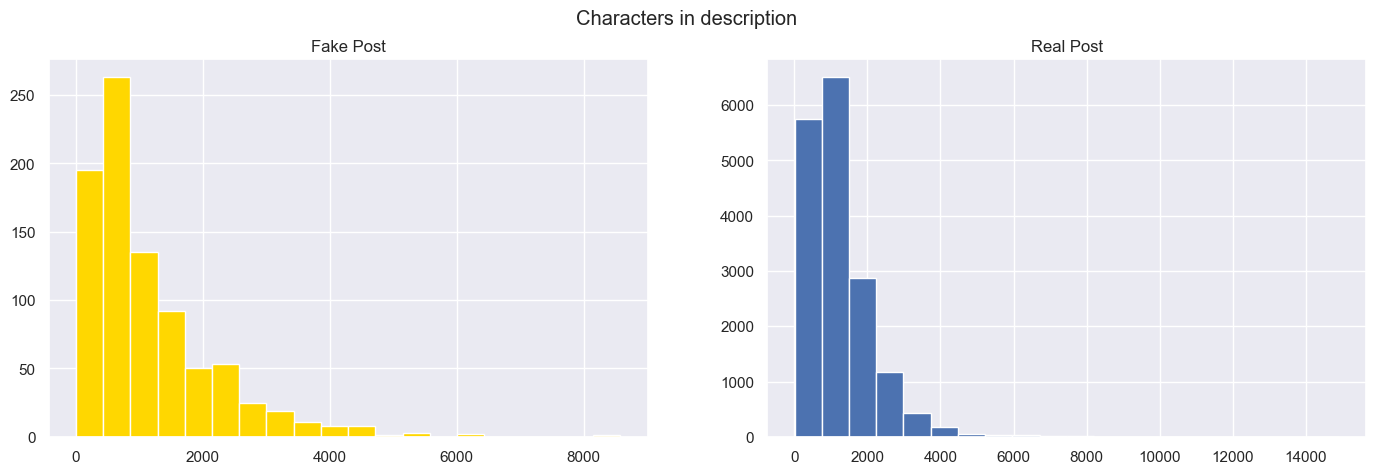

In [147]:
str_len_count('description',fake_job_df)

- Most of Real job posts have more charaters than Fake posts in job description. They have a closed mean, but the median of real job posts are 20% higher.
- The distribution are quite samilar, right skewed. There are few outliers in the Fake jobs.
- Compare with real jobs Fake job posts have a larger range on job description. From 0-6000 words,at the same time Real job posts are in the interval from 0 to 4500 words.  


### company_profile	

In [148]:
avg_table_maker('company_profile',fake_job_df,1)

,Fake job company_profile
mean,234.2806
median,5.0000


In [149]:
avg_table_maker('company_profile',fake_job_df,0)

,real job company_profile
mean,641.51443
median,588.00000


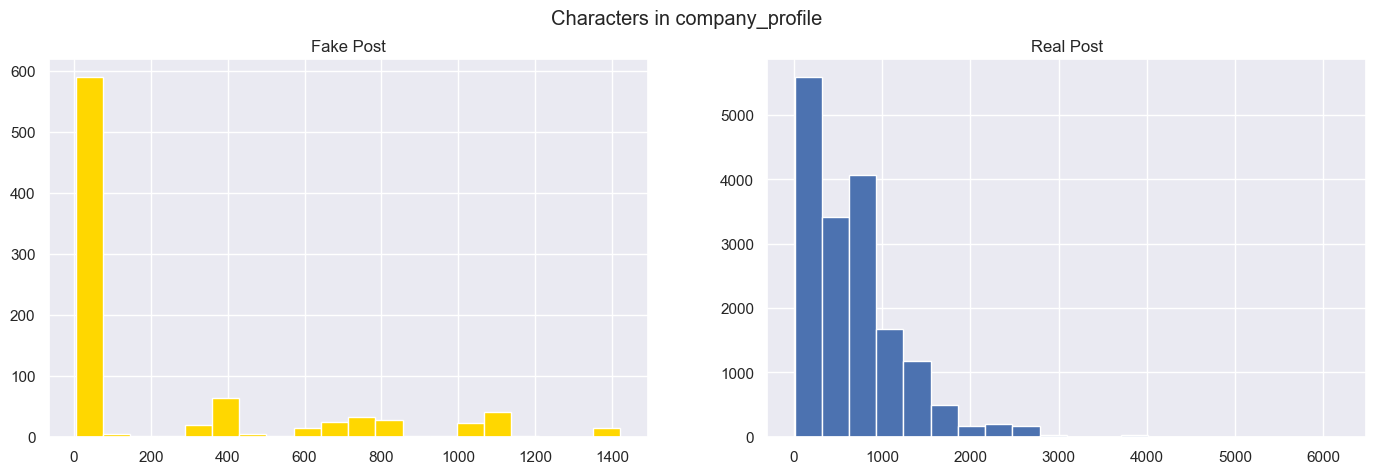

In [150]:
str_len_count('company_profile',fake_job_df)

- Pattern of words in company profile is same as character in company profile. fake post has less words in the company profile while real post has more words.
- Most of the fake job posts only have less then 600 words in the company profile, but the real jobs always have 500-650 words in the company_profile.


### requirements

In [151]:
avg_table_maker('requirements',fake_job_df,1)

,Fake job requirements
mean,446.938799
median,249.000000


In [152]:
avg_table_maker('requirements',fake_job_df,0)

,real job requirements
mean,598.085993
median,476.000000


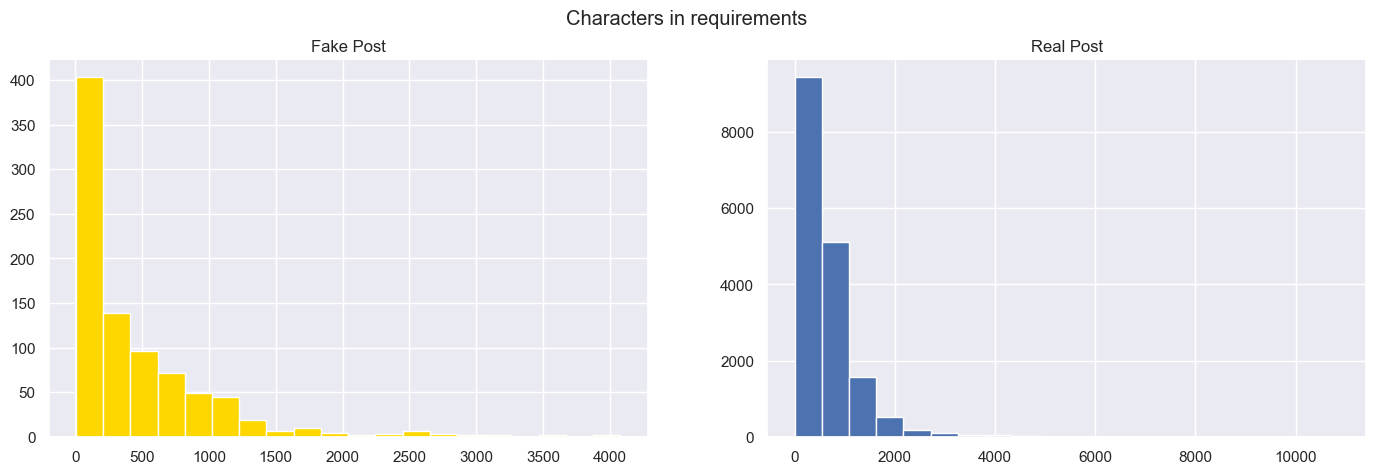

In [99]:
str_len_count('requirements',fake_job_df)

- Distribution looks similar,compare with the real job words counts in the requirements is 50% less. 

### benefits

In [100]:
avg_table_maker('benefits',fake_job_df,1)

,Fake job benefits
mean,214.297921
median,36.000000


In [101]:
avg_table_maker('benefits',fake_job_df,0)

,real job benefits
mean,210.658614
median,47.000000


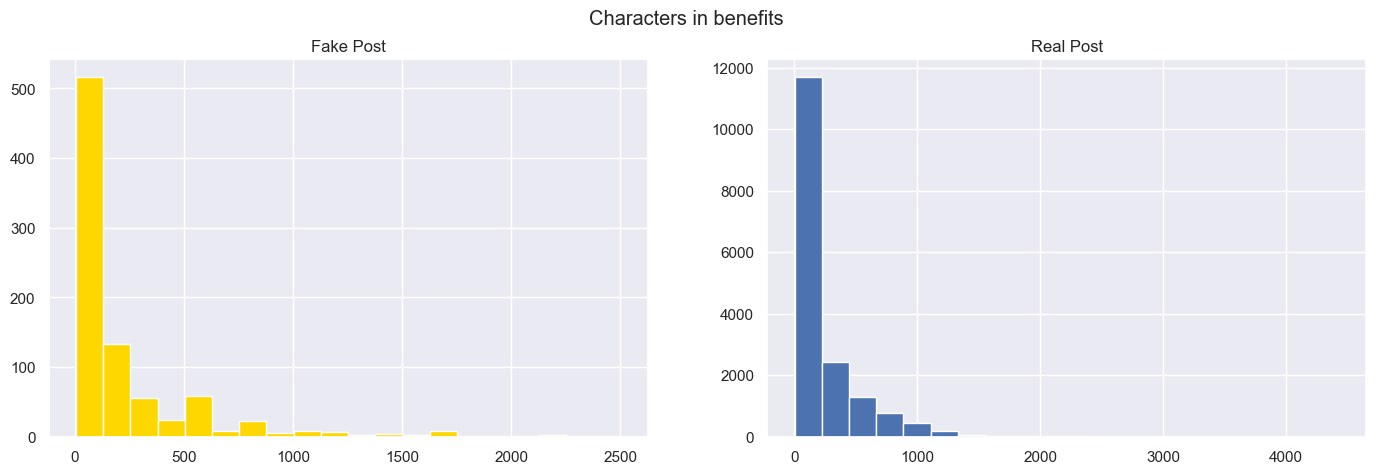

In [102]:
str_len_count('benefits',fake_job_df)

- Distribution almost same, also the mean and median of fake and real job posts are quite samiliar. These job scams are try their best to imitate real job posts.

# EDA Summary